## Tarea Semanal 3, Facundo Ivan Carranza

#### En esta tarea se analiza un fenómeno particular que surge al calcular la Transformada Discreta de Fourier (DFT): el desparramo espectral. Este efecto ocurre cuando la frecuencia de una señal senoidal no coincide exactamente con los múltiplos de la resolución espectral de la DFT, provocando que la energía de la señal se distribuya sobre varias frecuencias en lugar de concentrarse en un único valor.

#### El objetivo del trabajo es estudiar cómo pequeñas desintonías en la frecuencia de una señal afectan su espectro de potencia, verificar la potencia de la señal mediante la identidad de Parseval, y explorar la técnica de zero padding para mejorar la resolución espectral y observar cómo cambia la representación de la señal en el dominio de la frecuencia.

#### Este análisis permite comprender mejor las limitaciones prácticas de la DFT y la importancia de la resolución espectral al trabajar con señales discretas

## Introduccion Teorica

#### La DFT (Transformada Discreta de Fourier) permite representar señales discretas en el dominio de la frecuencia. Su resolución está determinada por Δf = f_s / N, donde f_s es la frecuencia de muestreo y N el número de muestras.

#### Cuando la frecuencia de una señal senoidal no coincide exactamente con un múltiplo de Δf, ocurre el desparramo espectral, distribuyendo la energía de la señal sobre varias frecuencias. La identidad de Parseval asegura que la energía total de la señal se conserva entre el dominio del tiempo y el de la frecuencia.

#### Además, mediante zero padding es posible aumentar la resolución espectral aparente, facilitando la visualización de los picos de frecuencia de la señal.

## Analisis y desarrollo

### Ejercicio A

#### Importamos nuestras librerias necesarias y defino las funciones que usare para generar mis señales.
#### Ademas defino las variables necesarias y genero las señales.

In [12]:
#%% Importo librerias
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
import scipy.signal as signal

In [13]:
# Defino variables y funciones %%

N = 1000      # Número de muestras
fs = N        # Frecuencia de muestreo = 1000 Hz
df = fs/N     # Resolución en frecuencia = 1 Hz
ts = 1/fs     # Período de muestreo = 0.001 s

def sen(ff, nn, amp=1, dc=0, ph=0, fs=2):
    Nn = np.arange(nn)   # Vector de índices: [0, 1, 2, ..., nn-1]
    t = Nn/fs            # Vector de tiempo
    x = dc + amp * np.sin(2 * np.pi * ff * t + ph)   # Señal senoidal
    return t, x

t1, x1 = sen(ff=(N/4)*df, nn=N, fs=fs)
t2, x2 = sen(ff=((N/4)+0.5)*df, nn=N, fs=fs)
t2, x3 = sen(ff=((N/4)+0.25)*df, nn=N, fs=fs)

#### En este paso aplicamos la Transformada Discreta de Fourier (DFT) a cada una de las señales senoidales mediante la función fft. A partir del resultado obtenemos dos representaciones fundamentales:

- El módulo (o magnitud), que muestra cómo se distribuye la energía de la señal en las distintas frecuencias.
- El ángulo (o fase), que indica el desfase de cada componente espectral.

#### Finalmente, definimos el vector de frecuencias Ff, que nos permitirá graficar los espectros y analizar visualmente el efecto del desparramo espectral al comparar las tres señales.

#### Procedere a graficar la magnitud en frecuencia de cada componente usando mi vector Ff, al graficar las 3 señales cada una con una desintonia diferente veremos como se distribuyen las componentes de manera diferente, ademas como la idea es poder ver claramente el desparramo decidi poner la magnitud de cada componente en dB, donde podremos ver claramente la diferencia 

In [14]:
# Aplico fourier y grafico%%

X1 = fft(x1)
X1abs = np.abs(X1)
X1ang = np.angle(X1)

X2 = fft(x2)
X2abs = np.abs(X2)
X2ang = np.angle(X2)

X3 = fft(x3)
X3abs = np.abs(X3)
X3ang = np.angle(X3)

Ff = np.arange(N)*df

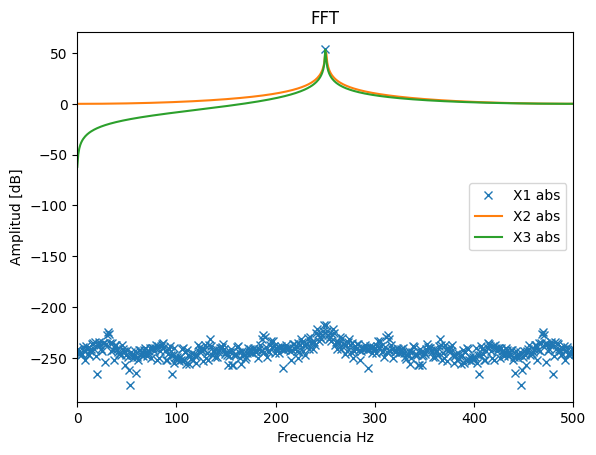

In [15]:
plt.figure(1)
plt.plot(Ff, 20* np.log10(X1abs), 'x', label='X1 abs')
plt.plot(Ff, 20*np.log10(X2abs), label='X2 abs')
plt.plot(Ff, 20*np.log10(X3abs), label='X3 abs')
plt.xlim((0, fs/2))
plt.title('FFT')
plt.xlabel('Frecuencia Hz')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.show()

### Ejercicio B

#### En este paso se normalizan las tres señales para que tengan varianza unitaria, es decir, una potencia normalizada que facilita la comparación entre ellas. Luego, se aplica la identidad de Parseval, que establece que la energía total de una señal en el dominio del tiempo debe ser igual a la energía en el dominio de la frecuencia.

#### De esta forma, se calcula y compara la suma de los cuadrados de las muestras en el tiempo con la suma de los módulos al cuadrado de la transformada en frecuencia. La pequeña diferencia observada se debe a errores numéricos de redondeo, confirmando que la relación de Parseval se cumple.

In [16]:

x1_norm = (x1 - np.mean(x1)) / (np.var(x1))**(1/2)
print ("Varianza =", np.var(x1_norm), " ->  SD =", np.std(x1_norm), " ->  Media =", np.mean(x1_norm))
x2_norm = (x2 - np.mean(x2)) / (np.var(x2))**(1/2)
print ("Varianza =", np.var(x2_norm), " ->  SD =", np.std(x2_norm), " ->  Media =", np.mean(x2_norm))
x3_norm = (x3 - np.mean(x1)) / (np.var(x3))**(1/2)
print ("Varianza =", np.var(x3_norm), " ->  SD =", np.std(x3_norm), " ->  Media =", np.mean(x3_norm))

### Verifico Parseval ###

A1 = np.sum ((np.abs(x1))**2)
B1 = np.sum ((np.abs(X1))**2) / N
print ("Esto es la diferencia entre Mod al cuadrado de x y X :",A1-B1)
A2 = np.sum ((np.abs(x2))**2)
B2 = np.sum ((np.abs(X2))**2) / N
print ("Esto es la diferencia entre Mod al cuadrado de x y X :",A2-B2)
A3 = np.sum ((np.abs(x3))**2)
B3 = np.sum ((np.abs(X3))**2) / N
print ("Esto es la diferencia entre Mod al cuadrado de x y X :",A3-B3)

Varianza = 1.0  ->  SD = 1.0  ->  Media = -8.171241461241152e-17
Varianza = 1.0  ->  SD = 1.0  ->  Media = 3.019806626980426e-17
Varianza = 1.0000000000000002  ->  SD = 1.0  ->  Media = -1.1104046314365235e-06
Esto es la diferencia entre Mod al cuadrado de x y X : 0.0
Esto es la diferencia entre Mod al cuadrado de x y X : -1.1368683772161603e-13
Esto es la diferencia entre Mod al cuadrado de x y X : 1.1368683772161603e-13


#### Como vemos la diferencia en los tres casos es 0, por lo que comprobamos la identidad de parseval.

### Ejercicio C

#### En este paso se aplica la técnica de zero padding, que consiste en agregar ceros al final de la señal original. Esto no cambia la información de la señal, pero al aumentar la cantidad total de muestras permite obtener una resolución espectral más fina en la DFT.

#### De esta manera, los picos en frecuencia se visualizan con mayor claridad, lo que facilita distinguir las pequeñas desintonías entre las señales. Finalmente, se grafican las magnitudes en dB para resaltar mejor las diferencias en el espectro.

In [17]:

zeros = np.zeros(9 * N)

x1_zp = np.concatenate([x1, zeros])
x2_zp = np.concatenate([x2, zeros])
x3_zp = np.concatenate([x3, zeros])

# %% FFT con Zero-Padding (Magnitud en dB)

# FFTs con zero padding
X1_zp = fft(x1_zp)
X2_zp = fft(x2_zp)
X3_zp = fft(x3_zp)

N_zp = len(x1_zp)      # Ahora = 10N
df_zp = fs / N_zp      # Resolución espectral más fina
freqs_zp = np.arange(N_zp) * df_zp

# Magnitudes en dB (20*log10 porque es amplitud, no potencia)
Mag1_dB = 20 * np.log10(np.abs(X1_zp))
Mag2_dB = 20 * np.log10(np.abs(X2_zp))
Mag3_dB = 20 * np.log10(np.abs(X3_zp))

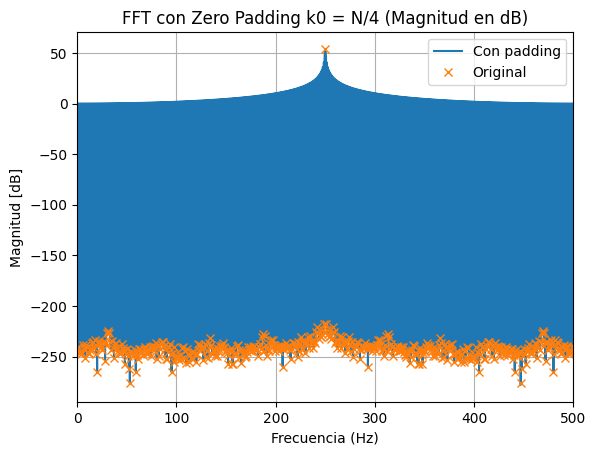

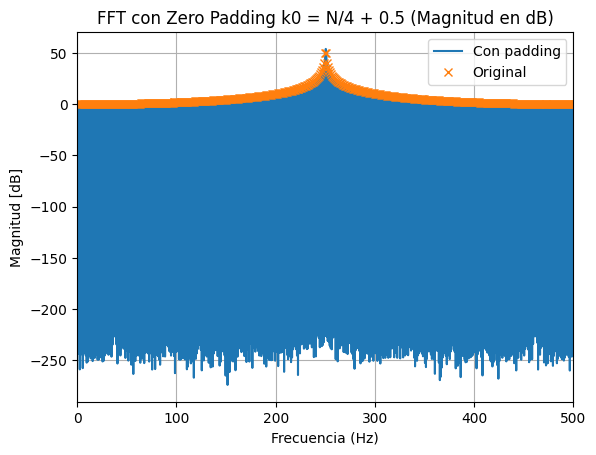

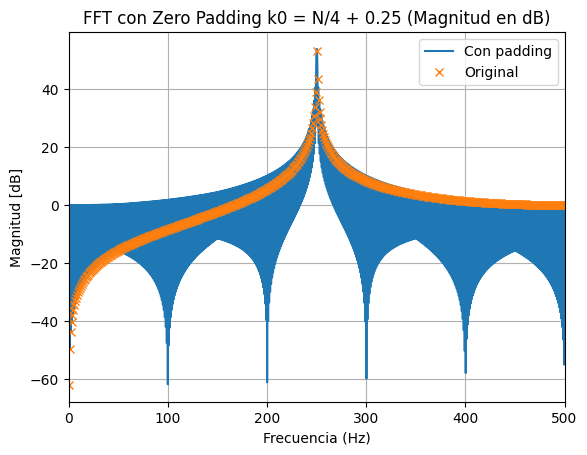

In [18]:

# Gráfico
plt.figure()
plt.plot(freqs_zp, Mag1_dB, label='Con padding')
plt.plot(Ff, 20* np.log10(X1abs), 'x', label='Original')
plt.xlim([0, fs/2])
plt.title('FFT con Zero Padding k0 = N/4 (Magnitud en dB)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud [dB]')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico
plt.figure()
plt.plot(freqs_zp, Mag2_dB, label='Con padding')
plt.plot(Ff, 20*np.log10(X2abs),'x', label='Original')
plt.xlim([0, fs/2])
plt.title('FFT con Zero Padding k0 = N/4 + 0.5 (Magnitud en dB)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud [dB]')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico
plt.figure()
plt.plot(freqs_zp, Mag3_dB, label='Con padding')
plt.plot(Ff, 20*np.log10(X3abs),'x', label='Original')
plt.xlim([0, fs/2])
plt.title('FFT con Zero Padding k0 = N/4 + 0.25 (Magnitud en dB)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud [dB]')
plt.legend()
plt.grid(True)
plt.show()

### Bonus

#### En este bloque se calcula y grafica la respuesta en frecuencia de un sistema definido por sus coeficientes a y 𝑏. Mediante la función freqz, se obtiene la relación entre entrada y salida en el dominio de la frecuencia:

#### Primero se representa la magnitud en dB, lo que permite identificar qué frecuencias son atenuadas o amplificadas por el sistema.

#### Luego se grafica la fase, que muestra cómo se modifican los desfases de las componentes espectrales de la señal.

#### De esta forma se obtiene una visión completa del comportamiento del sistema en frecuencia.

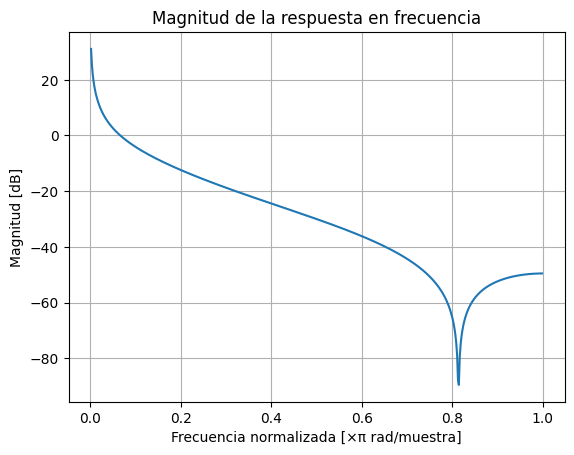

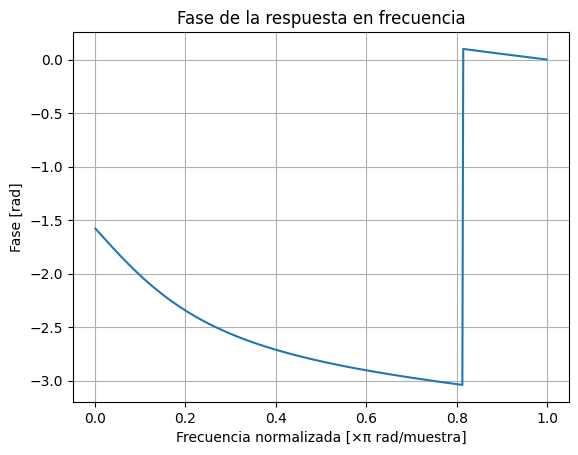

In [19]:

# Coeficientes del sistema (ejemplo)
b = [0.03, 0.05, 0.03]   # coeficientes de x
a = [1, -1.5, 0.5]       # coeficientes de y

# Obtener respuesta en frecuencia
w, h = signal.freqz(b, a)  # w es la frecuencia normalizada, h es la respuesta compleja

# Graficar magnitud en dB
plt.figure()
plt.plot(w/np.pi, 20*np.log10(np.abs(h)))  # Normalizamos frecuencia entre 0 y 1 (pi rad)
plt.title('Magnitud de la respuesta en frecuencia')
plt.xlabel('Frecuencia normalizada [×π rad/muestra]')
plt.ylabel('Magnitud [dB]')
plt.grid()
plt.show()

# Graficar fase
plt.figure()
plt.plot(w/np.pi, np.angle(h))
plt.title('Fase de la respuesta en frecuencia')
plt.xlabel('Frecuencia normalizada [×π rad/muestra]')
plt.ylabel('Fase [rad]')
plt.grid()
plt.show()

## Conclusiones

#### En el primer gráfico se observa claramente el efecto del desparramo espectral. La señal perfectamente alineada con la frecuencia de muestreo concentra toda su energía en un único pico definido, mientras que las señales con una ligera desintonía presentan un ensanchamiento en el espectro. Esto hace que su energía no quede localizada en un solo bin de la DFT, sino que se distribuya entre frecuencias vecinas, mostrando cómo pequeñas diferencias de frecuencia generan cambios significativos en la representación espectral.

#### En las gráficas siguientes se comparan los espectros obtenidos con y sin la técnica de zero padding. Puede verse que:

#### Cuando la frecuencia coincide exactamente con un múltiplo de la resolución espectral, el zero padding no cambia el contenido, solo hace más suave y detallada la curva alrededor del pico.

#### En los casos con desintonía, el zero padding no elimina el desparramo espectral, pero permite observarlo con mucha más resolución. Esto hace visibles las diferencias en la forma y amplitud de las “colas” que se generan alrededor del pico principal.Por lo que vemos que zero padding no modifica la información de la señal, pero sí mejora la representación gráfica del espectro, facilitando la interpretación de los efectos de desintonía.

#### Despues he realizado el Bonus y pude analizar tanto su magnitud como su fase:

#### Magnitud (arriba): Se observa que el sistema atenúa progresivamente las frecuencias a medida que aumentan. En particular, alrededor de la frecuencia normalizada ≈ 0.8, aparece un “cero” muy marcado, lo que indica que el sistema prácticamente elimina esa componente de frecuencia. En bajas frecuencias la ganancia es mayor, por lo que el sistema refuerza esas componentes.

#### Fase (abajo): La fase varía de manera continua con la frecuencia, mostrando un retardo creciente. En el punto donde aparece el cero en la magnitud (≈ 0.8), se da un cambio brusco de fase, lo que es característico de filtros con polos y ceros cercanos al eje unitario.

## Autoevaluacion del aprendizaje

#### Personalmente es un trabajo que disfrute hacer porque pude ver plasmado muchos de los conceptos vistos en la teorica. Pude aprender a realizar la transformada de manera practica y poder graficarlo comprendiend mejor el concepto de resolucion en frecuencia y saber mejor la identidad de parseval pudiendo demostrarla, ademas poder entender las complicaciones que trae llevar a todo a la practica, la tecnica del zero padding fue especialmente complicada para mi por no ppder entender claramente lo que veia pero con un poco de explicacion del profesor y estudio pude entenderlo, ademas me encanto el bonus poque no solo pude comprender y ver con mis ojos la respuesta en freceucnai de un sistema sino que tambien pued utilizar conceptos de la tarea anterior 